In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
wine_data=pd.read_csv('wine.csv')

In [4]:
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
wine_data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

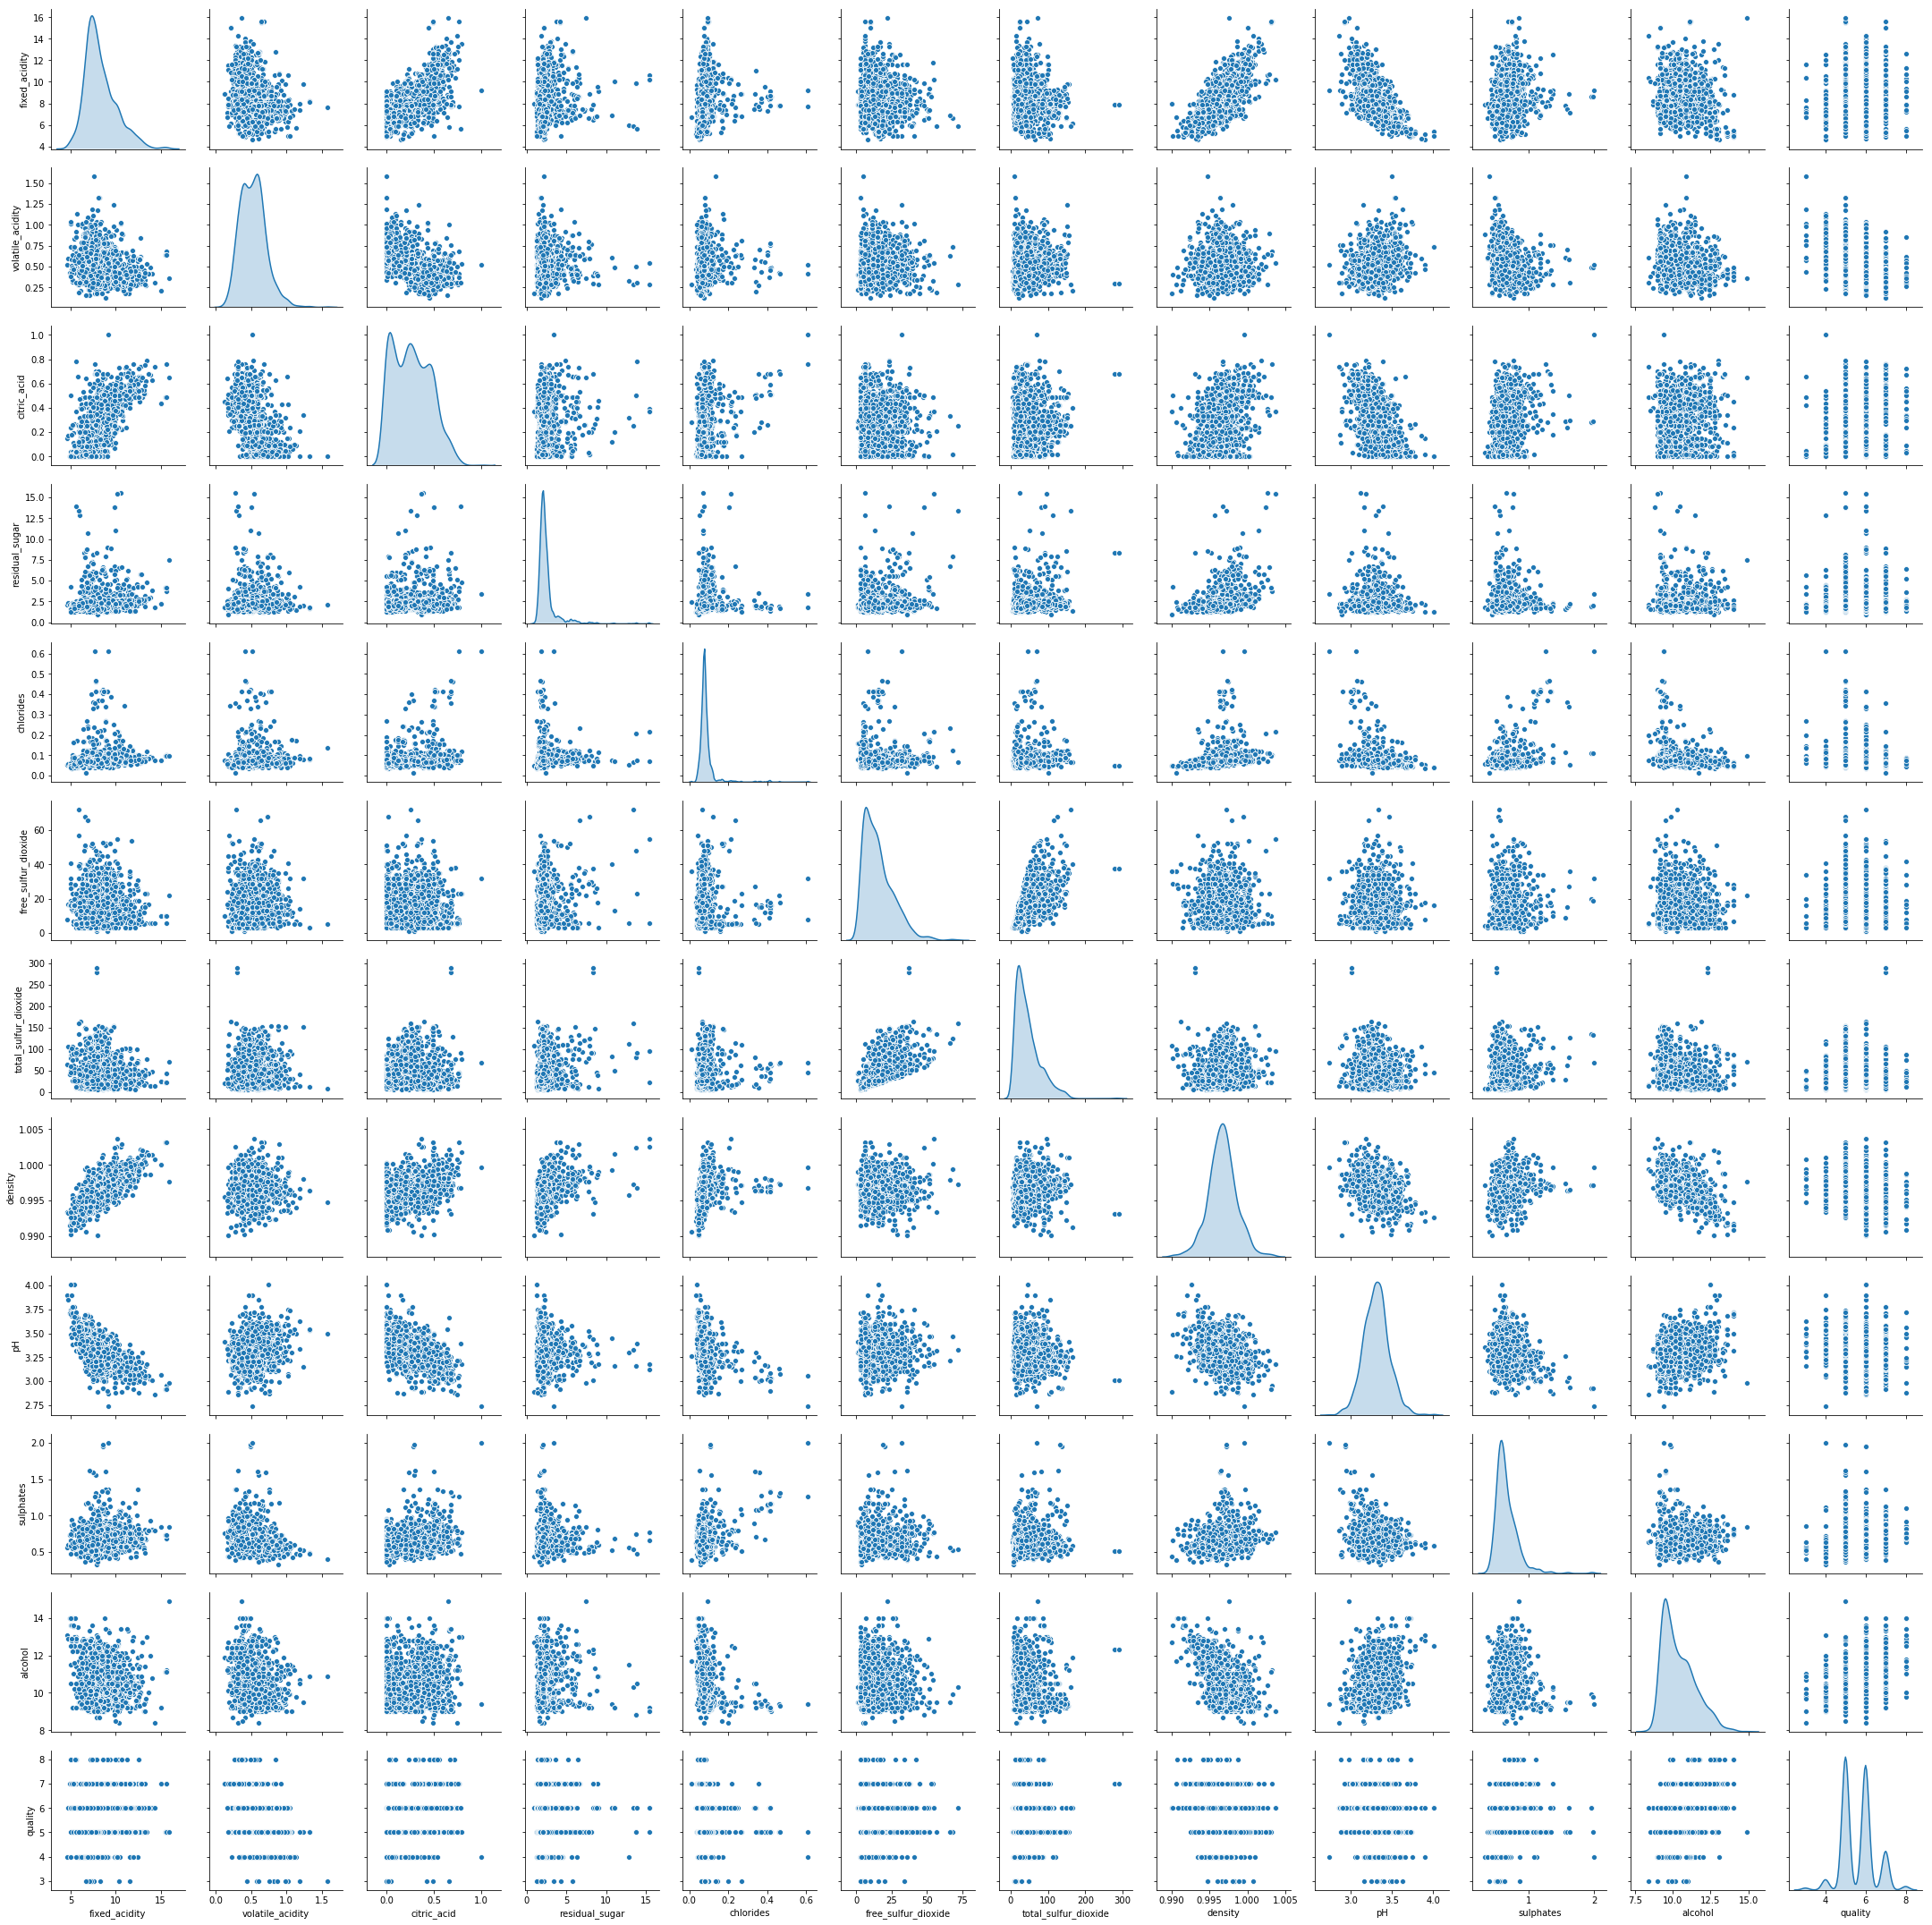

In [7]:
sns.pairplot(wine_data , diag_kind = 'kde')
#graph shows the relation between dependent variable and target variable 

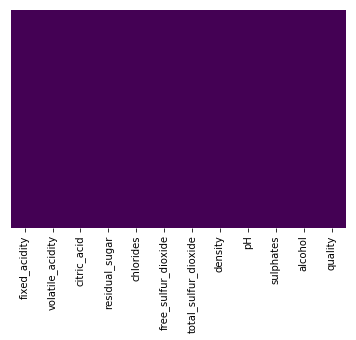

In [8]:
#check null value 
sns.heatmap(wine_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#graph shows that it dont have any null values

In [9]:
wine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
wine_data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# EDA 

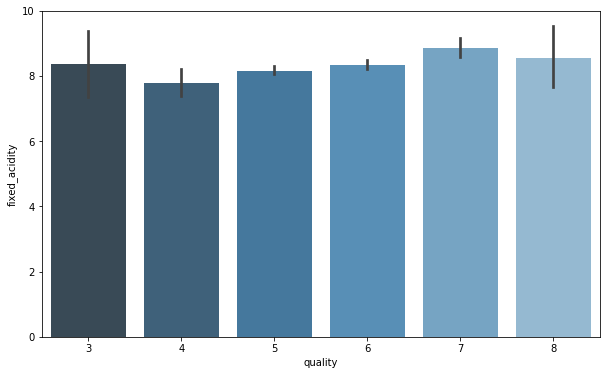

In [11]:
fig=plt.figure(figsize=(10,6))
barplot=sns.barplot(x='quality',y='fixed_acidity',data=wine_data,palette="Blues_d")

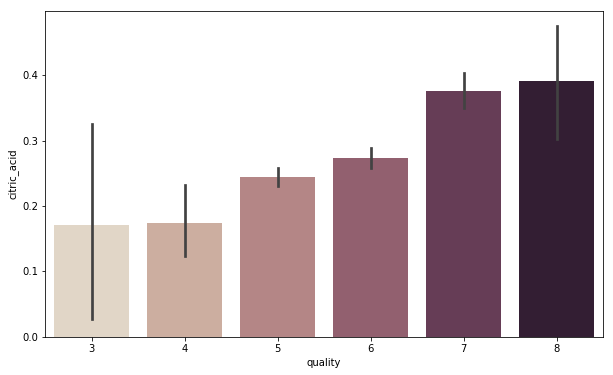

In [12]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric_acid',data=wine_data,palette="ch:.25")

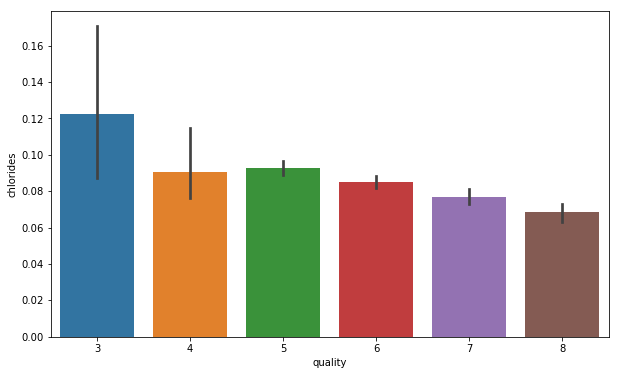

In [13]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=wine_data)

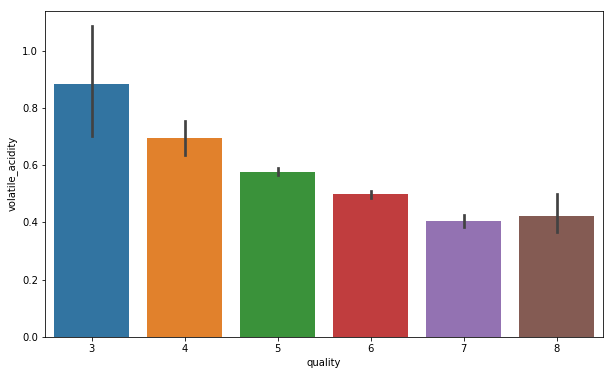

In [14]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile_acidity',data=wine_data)

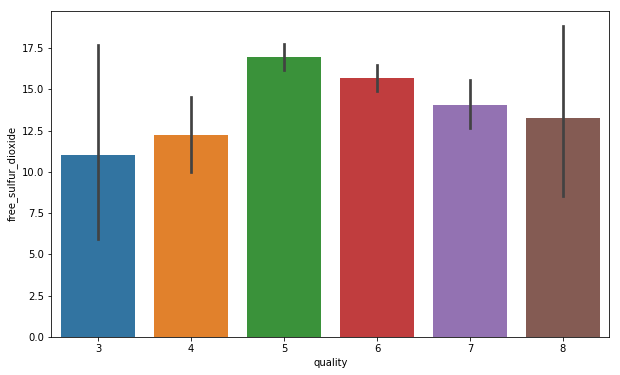

In [15]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free_sulfur_dioxide',data=wine_data)

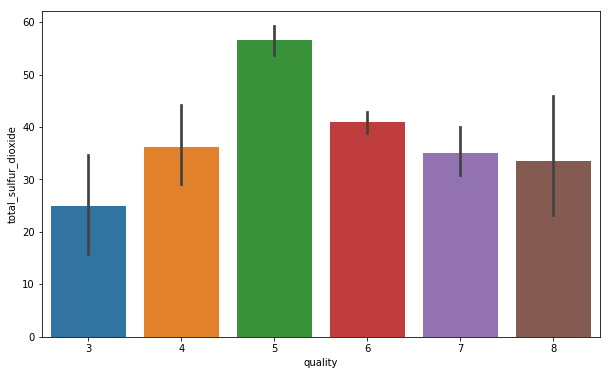

In [16]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total_sulfur_dioxide',data=wine_data)

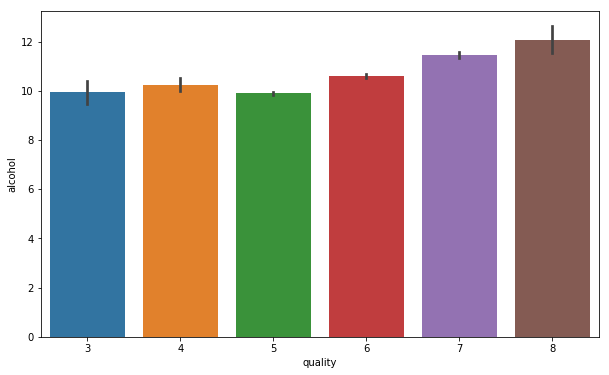

In [17]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol',data=wine_data)

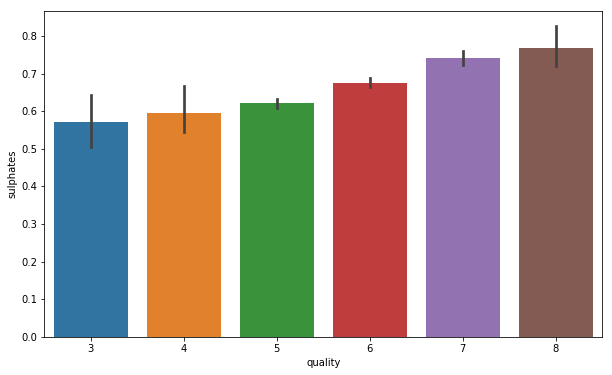

In [18]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates',data=wine_data)

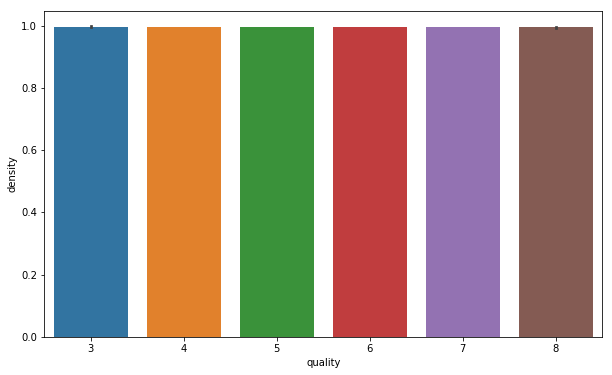

In [19]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='density',data=wine_data)

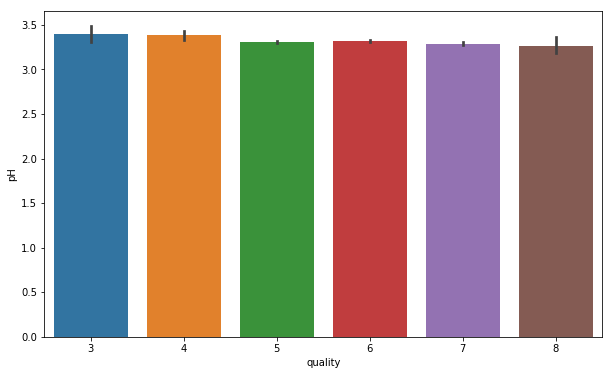

In [20]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='pH',data=wine_data)

<Figure size 3600x3600 with 0 Axes>

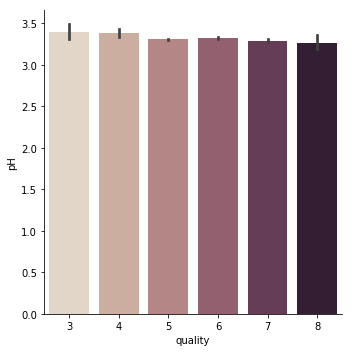

In [21]:
fig=plt.figure(figsize=(50,50))
sns.catplot(x="quality",y='pH', kind="bar", palette="ch:.25", data=wine_data)

## above graphs show that :
DENSITY and pH dont show impact on quality of wine 
as they depend on the other componets which are present in wine

In [23]:
wine_data=wine_data.drop('density', axis=1)
wine_data=wine_data.drop('pH', axis=1)

# Data Processing 

In [25]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [28]:
pd.cut?

In [29]:
#converting into binary classification 
bins = (2, 6 , 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

In [30]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 
wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])
wine_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

after converting data into binary classification problem we are facing imbalancing of data i.e bad:good is 1382:217 which can generate false prediction 

we have to balance the data as the data set is not in huge number oversampling would be appropriate for this

#oversampling #increasing quantity of good as to bad

In [31]:
good_data=wine_data[wine_data['quality']==1]
bad_data=wine_data[wine_data['quality']==0]
print("(shape of good_data) (shape of bad_data) :\n")
print(good_data.shape,bad_data.shape)

(shape of good_data) (shape of bad_data) :

(217, 10) (1382, 10)


<Figure size 3600x3600 with 0 Axes>

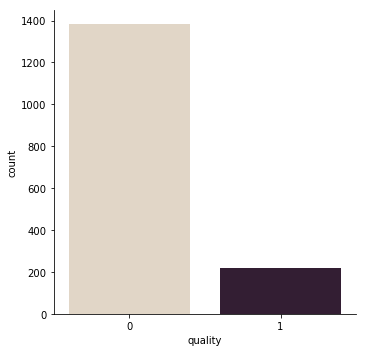

In [32]:
fig=plt.figure(figsize=(50,50))
sns.catplot(x="quality", kind="count", palette="ch:.25", data=wine_data)

In [33]:
y=wine_data['quality']
df=wine_data.drop('quality',axis=1)
x=df

In [34]:
from imblearn.combine import SMOTETomek #combination of oversampling and undersampling

In [35]:
os_us = SMOTETomek(random_state=42)
X_train_res1, y_train_res1 = os_us.fit_sample(x, y)

In [36]:
X_train_res1.shape,y_train_res1.shape

((2744, 9), (2744,))

## machine learning model 
1. logistic regression
2. Decision Tree
3. Random Forest

## Decision Tree

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
y=wine_data['quality']
df=wine_data.drop('quality',axis=1)
x=df

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res1, y_train_res1,test_size=0.25,random_state=10)

In [40]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,alcohol
2024,7.798808,0.373974,0.367232,2.162649,0.073579,6.000000,12.00000,0.682649,11.836159
2029,8.948404,0.499393,0.349089,2.342412,0.063939,30.030350,54.96965,0.717875,11.018132
2653,9.204529,0.418736,0.318019,2.367547,0.069243,9.639622,28.00000,0.727660,11.200000
881,7.200000,0.340000,0.240000,2.000000,0.071000,30.000000,52.00000,0.580000,10.100000
632,9.500000,0.590000,0.440000,2.300000,0.071000,21.000000,68.00000,0.630000,9.500000


In [41]:
y_train.head()

2024    1
2029    1
2653    1
881     0
632     0
Name: quality, dtype: int32

In [42]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
confidence = clf.score(X_test, y_test)
print("\nThe confidence score:\n")
print(confidence)


The confidence score:

0.9183673469387755


In [44]:
y_pred = clf.predict(X_test)

#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,5):
    print (x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
print (y_test.head())


The prediction:

0
0
0
0
0

The expectation:

1475    0
1441    0
879     0
1149    0
212     0
Name: quality, dtype: int32


## Random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
pred_rf=random_forest.predict(X_test)

In [48]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       348
           1       0.91      0.98      0.94       338

    accuracy                           0.94       686
   macro avg       0.95      0.94      0.94       686
weighted avg       0.95      0.94      0.94       686



In [49]:
confidence_rf = random_forest.score(X_test, y_test)
print("\nThe confidence score:\n")
print(confidence)


The confidence score:

0.9183673469387755


In [50]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9183673469387755


## logistic regression


In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
regression=LogisticRegression()
regression.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [52]:
regression_pred=regression.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, regression_pred)) 

Accuracy :  0.8090379008746356


In [54]:
#converting the numpy array to list
x=np.array(regression_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,5):
    print (x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
print (y_test.head())


The prediction:

0
0
0
1
0

The expectation:

1475    0
1441    0
879     0
1149    0
212     0
Name: quality, dtype: int32
